In [4]:
from pandas import DataFrame, read_csv
import pandas as pd 
twitter_url_reps = r'reps.csv'
pd.set_option('mode.chained_assignment', None)
acc_df = pd.read_csv(twitter_url_reps)
df2 = acc_df[['name', 'twitter', 'party']]
df2.head()

,name,twitter,party
0,Sherrod Brown,SenSherrodBrown,Democrat
1,Maria Cantwell,SenatorCantwell,Democrat
2,Benjamin L. Cardin,SenatorCardin,Democrat
3,Thomas R. Carper,SenatorCarper,Democrat
4,"Robert P. Casey, Jr.",SenBobCasey,Democrat


In [5]:
import pandas as pd
df = pd.read_csv("./tweets/tweets.csv")

In [6]:
dem_tweets = [x for i,x in df.iterrows() if x["party"] == "Democrat"]
rep_tweets = [x for i,x in df.iterrows() if x["party"] == "Republican"]
print(len(rep_tweets))
print(len(dem_tweets))

21234
42820


In [7]:
!pip install num2words

In [8]:
df = df[df.party != 'Independent']
democrat_tweets_df = df[df.party == 'Democrat']
republican_tweets_df = df[df.party == 'Republican']
democrat_tweets_df = democrat_tweets_df.sample(frac = 0.5)
# df = democrat_tweets_df + republican_tweets_df

In [9]:
republican_tweets_df.drop(['Unnamed: 0'],  axis=1, inplace=True)
democrat_tweets_df.drop(['Unnamed: 0'],  axis=1, inplace=True)

In [10]:
frames = [democrat_tweets_df, republican_tweets_df]
df = pd.concat(frames)

In [11]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import numpy as np
import math
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quynh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quynh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quynh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Counter({'Democrat': 21410, 'Republican': 21234})


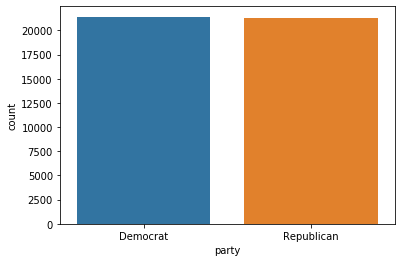

In [12]:
import seaborn as sns
def plot_count(data):
    y = Counter(data)
    print(y)
    sns.countplot(data)
plot_count(df['party'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report,accuracy_score

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(df['tweet'], df['party'], test_size = 0.25, random_state = 42, stratify=df['party'])

In [15]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import nltk
import random
import numpy as np
from collections import Counter, OrderedDict
import nltk
from copy import deepcopy
flatten = lambda l: [item for sublist in l for item in sublist]
random.seed(1024)

In [16]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
import numpy as np
import pandas as pd
import random
from sklearn import tree
import copy
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.utils import resample
from tensorflow.keras.layers import Dropout, Dense, GRU, Embedding
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pickle as pkl
from sklearn import metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, Dense,Input,Embedding,Flatten, AveragePooling2D, Conv2D,Reshape
from tensorflow.keras.models import Sequential,Model

## SVM model

In [53]:
def svm(X_train, y_train, X_test, y_test):
    text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])

    text_clf.fit(X_train, y_train)
    # Save the model here (uncomment the line below)
    pkl.dump(text_clf, open('./results/svm.pkl', 'wb'))


    predicted = text_clf.predict(X_test)

    print(metrics.classification_report(y_test, predicted))

In [54]:
svm(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

    Democrat       0.84      0.84      0.84      5353
  Republican       0.84      0.84      0.84      5308

    accuracy                           0.84     10661
   macro avg       0.84      0.84      0.84     10661
weighted avg       0.84      0.84      0.84     10661



In [56]:
import pickle
svm_results = pickle.load(open("./results/svm.pkl", "rb"))
svm_results

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                     

In [22]:
def rocchio(X_train, y_train, X_test, y_test):
    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', NearestCentroid()),
                         ])

    text_clf.fit(X_train, y_train)


    predicted = text_clf.predict(X_test)

    print(metrics.classification_report(y_test, predicted))
rocchio(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

    Democrat       0.72      0.71      0.71      5353
  Republican       0.71      0.72      0.72      5308

    accuracy                           0.71     10661
   macro avg       0.71      0.71      0.71     10661
weighted avg       0.72      0.71      0.71     10661



### Random Forest Classifier

In [23]:
def random_forest(X_train, y_train, X_test, y_test):
    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', RandomForestClassifier(n_estimators=100)),
                         ])

    text_clf.fit(X_train, y_train)
    
    # Save the model here (uncomment the line below)
    # pkl.dump(text_clf, open('./relevance-model.pkl', 'wb'))

    predicted = text_clf.predict(X_test)

    print(metrics.classification_report(y_test, predicted))

In [24]:
random_forest(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

    Democrat       0.77      0.81      0.79      5353
  Republican       0.80      0.76      0.78      5308

    accuracy                           0.79     10661
   macro avg       0.79      0.79      0.78     10661
weighted avg       0.79      0.79      0.79     10661



### Naive Bayes

In [27]:
def naive_bayes(X_train, y_train, X_test, y_test):
    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB()),
                         ])

    text_clf.fit(X_train, y_train)


    predicted = text_clf.predict(X_test)

    print(metrics.classification_report(y_test, predicted))

In [28]:
naive_bayes(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

    Democrat       0.81      0.84      0.83      5353
  Republican       0.83      0.80      0.82      5308

    accuracy                           0.82     10661
   macro avg       0.82      0.82      0.82     10661
weighted avg       0.82      0.82      0.82     10661



### K Nearest Neighbors

In [29]:
def knn(X_train, y_train, X_test, y_test):
    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', KNeighborsClassifier()),
                         ])

    text_clf.fit(X_train, y_train)


    predicted = text_clf.predict(X_test)

    print(metrics.classification_report(y_test, predicted))

In [30]:
knn(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

    Democrat       0.79      0.77      0.78      5353
  Republican       0.77      0.79      0.78      5308

    accuracy                           0.78     10661
   macro avg       0.78      0.78      0.78     10661
weighted avg       0.78      0.78      0.78     10661



### Decision Trees

In [33]:
def decision_trees(X_train, y_train, X_test, y_test):
    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', tree.DecisionTreeClassifier()),
                         ])

    text_clf.fit(X_train, y_train)


    predicted = text_clf.predict(X_test)

    print(metrics.classification_report(y_test, predicted))

In [34]:
decision_trees(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

    Democrat       0.66      0.67      0.66      5353
  Republican       0.66      0.65      0.66      5308

    accuracy                           0.66     10661
   macro avg       0.66      0.66      0.66     10661
weighted avg       0.66      0.66      0.66     10661



### Adaboost

In [38]:
# Part 1 Solution

# --- Insert code here ---
class AdaBoostTrees(object):
    
#   Note: You will need to remove the "pass" statements

    def __init__(self, n_estimators=10, max_depth=1):

#       self.n_estimators : The number of decision tree classifiers used in the ensemble.
#       self.max_depth    : The max_depth setting for each of the DecisionTree objects.
#       self.trees        : A list containing all of the DecisionTree objects.
#       self.tree_weights : A list containing the weight of each of the trained DecisionTree objects.

        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
        self.tree_weights = []
    
    def fit(self, x_train, y_train):
        
#       This method takes as input two numpy arrays, x_train and y_train,
#       and modifies the AdaBoostTrees object in-place. This method implements
#       the AdaBoost algorithm using sci-kit learn's DecisionTreeClassifier
#       as the "weak learner".

#       --- Insert code here ---
        # Samples x1.... xN
        num_samples = len(y_train)
        
        # Initialize the observation weights to 1 / N
        wt = np.ones(num_samples) / num_samples
        
        # Number of weak classifiers used
        M = self.n_estimators
              
        for i in range(M):
            # 1. Fit a classifier G(x) to the training data using weights Wi
            tree_estimator = tree.DecisionTreeClassifier(max_depth = self.max_depth)
            tree_estimator.fit(x_train, y_train, sample_weight = wt)
            predict = tree_estimator.predict(x_train)
            
            # Get incorrect classifications
            incorrect = [int(x) for x in predict != y_train]
            
            # Find the weak learner that minimizes the weighted 
            # sum error for misclassified points
            err = np.dot(wt, incorrect) / sum(wt)
            
            # Compute alpha, which is the say - maybe add constant term if 
            # freaks out
            alpha = 0.5 * np.log((1 - err) / err)
            
            # Update the weights
            wt = np.multiply(wt, np.exp([alpha * i for i in incorrect]))
            
            # Normalize to 1
            wt /= np.sum(wt)
            
            # Possibly add it to the list of tree_weights
            self.tree_weights.append(wt)
            
            # Add the classifier
            self.trees.append((tree_estimator, alpha))
            
    def predict(self, x):
        
#       This method takes as input a numpy array of size (N, D) and 
#       returns a numpy array of predictions of size (N). Calling this 
#       method requires that fit() has already been run on the training data.    

#       --- Insert code here ---        
        pred_test = np.zeros(len(x))
        
        for clf, alpha in self.trees:
            # 1. Fit a classifier G(x) to the training data using weights Wi
            pred_test_i = clf.predict(x)
            
            pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha for x in pred_test_i])]

        # Return sign of prediction sum
        y_pred = np.sign(pred_test)

        return y_pred

In [57]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
# Make the dataset iterable
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(X_test) / batch_size)
num_epochs = int(num_epochs)



train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)